<a href="https://colab.research.google.com/github/HananLuayAli/HananLuayAli/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "Real estate.csv"  # Replace with your file path
df = pd.read_csv(file_path)

# Step 1: Data cleaning and preperation
# Remove 'No' column if it exists
if 'No' in df.columns:
    df = df.drop(columns=['No'])



# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


                            X1 transaction date  Y house price of unit area
X1 transaction date                    1.000000                    0.087491
Y house price of unit area             0.087491                    1.000000


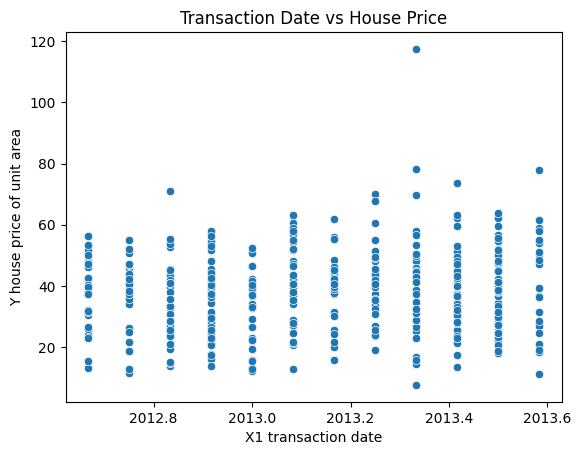

In [8]:
# Step 2: Exploratory analysis and features selection
# Correlation with the Tranaction Date
print(df[['X1 transaction date', 'Y house price of unit area']].corr())
sns.scatterplot(data=df, x='X1 transaction date', y='Y house price of unit area')
plt.title('Transaction Date vs House Price')
plt.show()

In [9]:
# Drop the X1 transaction date column
if 'X1 transaction date' in df.columns:
    df = df.drop(columns=['X1 transaction date'])


Correlation with Target (Y house price of unit area):
 X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
Y house price of unit area                1.000000
Name: Y house price of unit area, dtype: float64


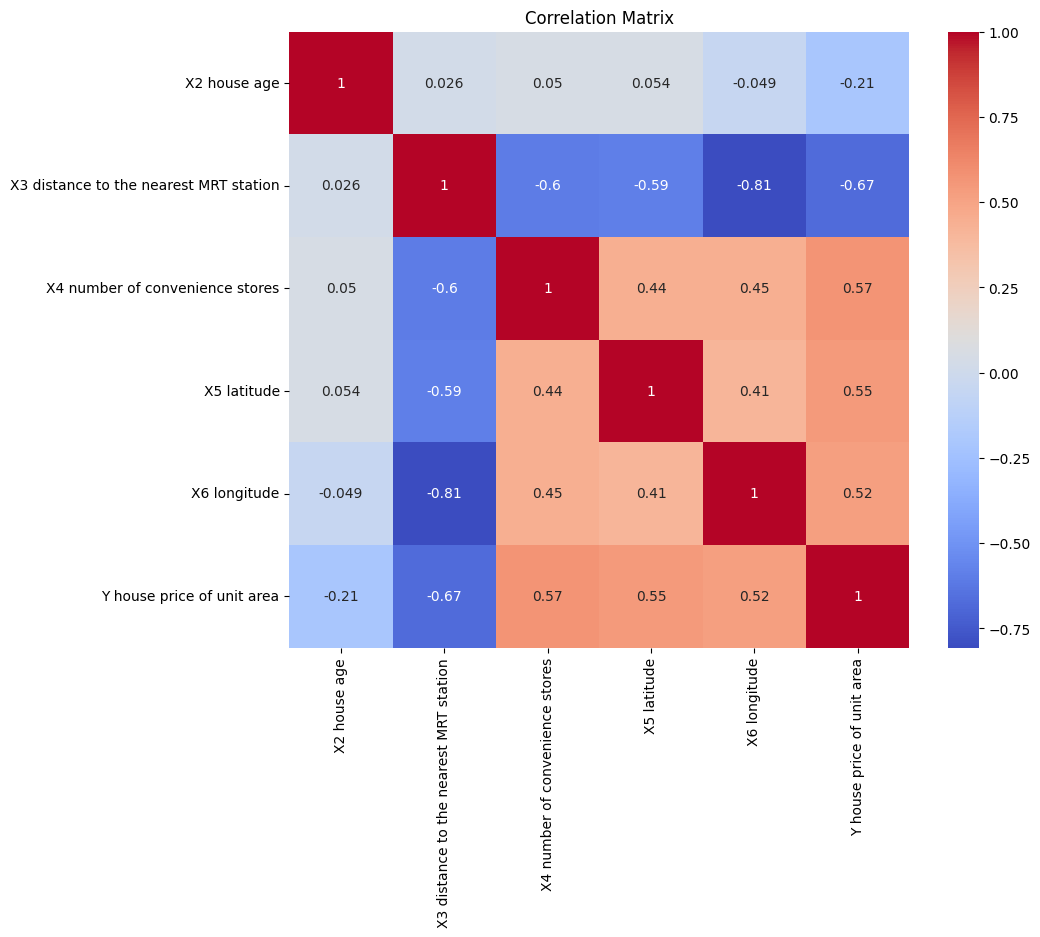

In [4]:
# Compute correlation matrix
correlation_matrix = df.corr()
print("\nCorrelation with Target (Y house price of unit area):\n", correlation_matrix['Y house price of unit area'])

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

